In [1]:
import yt
from yt.visualization.volume_rendering.transfer_function_helper import TransferFunctionHelper
from foggie.utils.get_refine_box import *
from foggie.utils.consistency import density_color_map
from astropy.table import Table

/Users/acharyya/Work/astro/ayan_codes/yt/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /Users/acharyya/.config/yt/ytrc is deprecated in favor of /Users/acharyya/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0.This feature will be removed in v4.1.0
  from yt.config import ytcfg


In [18]:
ds = yt.load("/Users/acharyya/models/simulation_output/foggie/halo_004123/nref11c_nref9f/RD0038/RD0038")

yt : [INFO     ] 2021-07-02 13:38:26,169 Parameters: current_time              = 525.356646014
yt : [INFO     ] 2021-07-02 13:38:26,170 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2021-07-02 13:38:26,172 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-07-02 13:38:26,173 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2021-07-02 13:38:26,175 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-07-02 13:38:26,175 Parameters: current_redshift          = 0.1999999919284
yt : [INFO     ] 2021-07-02 13:38:26,176 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2021-07-02 13:38:26,176 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2021-07-02 13:38:26,177 Parameters: omega_radiation           = 0
yt : [INFO     ] 2021-07-02 13:38:26,177 Parameters: hubble_constant           = 0.695


In [19]:
fig_dir = '/Users/acharyya/Work/astro/foggie_outputs/plots_halo_004123/nref11c_nref9f/figs/RD0038/'
trackname = '/Users/acharyya/Work/astro/ayan_codes/foggie/foggie/halo_tracks/004123/nref11n_selfshield_15/halo_track_200kpc_nref9'
track = Table.read(trackname, format='ascii')
track.sort('col1')
zsnap = ds.get_parameter('CosmologyCurrentRedshift')
refine_box, refine_box_center, x_width = get_refine_box(ds, zsnap, track)

Parsing Hierarchy :   0%|          | 0/12166 [00:00<?, ?it/s]

get_refine_box: using this location:       col1         col2     col3     col4     col5     col6     col7   col8
---------------- -------- -------- -------- -------- -------- -------- ----
0.20008072174869 0.472893 0.457659 0.470829 0.474893 0.459659 0.472829    9


Parsing Hierarchy : 100%|█████████▉| 12165/12166 [00:01<00:00, 6959.24it/s]
yt : [INFO     ] 2021-07-02 13:38:31,728 Gathering a field list (this may take a moment.)


In [ ]:
#%run projection_plot.py --system ayan_hd --halo 4123 --output RD0038 --noplot --fullbox

In [111]:
sc = yt.create_scene(refine_box, field=('gas', 'density'))

In [112]:
# Set the bounds of the transfer function
bounds = (1e-29, 1e-22)
bounds_cgh = (ds.quan(bounds[0], 'g/cm**3'), ds.quan(bounds[1], 'g/cm**3'))
colormap = 'viridis' # 'cividis' # density_color_map # 

In [113]:
# think of color transfer functions as contours in 3D that are NOT NECESSARILY evenly spaced
tfh = TransferFunctionHelper(ds)
tfh.set_field(('gas', 'density'))
tfh.set_bounds(bounds)
tfh.set_log(True)
tfh.build_transfer_function()
tfh.grey_opacity = True

In [114]:
def linramp(vals, minval, maxval):
    return (vals - vals.min())/(vals.max() - vals.min())

# add_layers() function will add evenly spaced isocontours along the transfer function, sampling a colormap to determine the colors of the layers
nlayers = 8
color_max = 3e-24
#color_max = 1e-24

tfh.tf.add_layers(nlayers, w=0.01, alpha=np.logspace(-2.5,0,nlayers), colormap=colormap, ma=np.log10(color_max), mi=np.log10(bounds[0]), col_bounds=[np.log10(bounds[0]),np.log10(color_max)])

# to add a single gaussian layer with a color determined by a colormap value, use sample_colormap()
#tfh.tf.sample_colormap(np.log10(2e-24), w=0.03, colormap=colormap)

# if you would like to add a gaussian with a customized color or no color, use add_gaussian()
tfh.tf.add_gaussian(np.log10(1e-23), width=.005, height=[1, 0.35, 0.0, 2.0]) # height = [R,G,B,alpha]
tfh.tf.add_gaussian(np.log10(3e-23), width=.005, height=[1, 1, 0.8, 5.0]) # height = [R,G,B,alpha]
#tfh.tf.add_gaussian(np.log10(3.5e-24), width=.02, height=[1, 0.7, 0.0, 1.5]) # height = [R,G,B,alpha]

# Where the above options produced layered volume renderings, map_to_colormap() allows all of the density values 
# in a dataset to contribute to the volume rendering.\
#tfh.tf.map_to_colormap(np.log10(bounds[0]), np.log10(bounds[1]), colormap=colormap, scale_func=linramp)


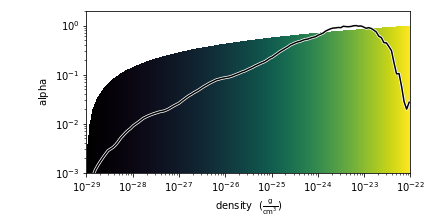

In [24]:
tfh.plot(profile_field=('gas', 'density'))

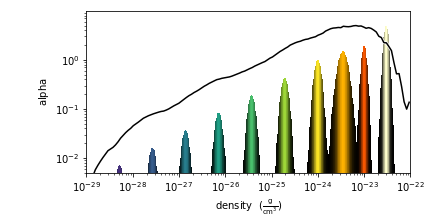

In [87]:
tfh.plot(profile_field=('gas', 'density'))

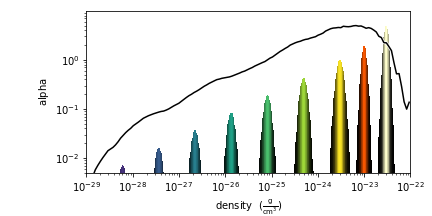

In [99]:
tfh.plot(profile_field=('gas', 'density'))

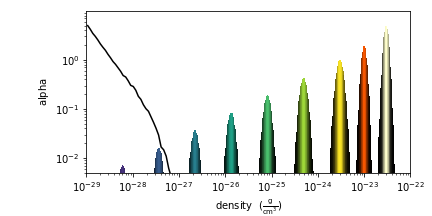

In [63]:
tfh.plot(profile_field='cell_volume')

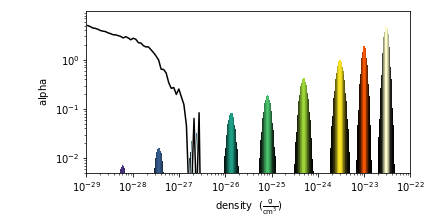

In [64]:
tfh.plot(profile_field='cell_mass')

In [115]:
cam = sc.add_camera(refine_box, lens_type='perspective')
#cam = sc.camera
print('Default', cam)
cam.resolution = (512, 512)
cam.set_position(refine_box.left_edge)
cam.focus = refine_box.center
#cam.focus = ds.domain_center
cam.north_vector = [1,0,0]
cam.zoom(1.68) ## temporary
cam.switch_view()
print('New', cam)

Default <Camera Object>:
	position:[1. 1. 1.] code_length
	focus:[0.5 0.5 0.5] code_length
	north_vector:[ 0.81649658 -0.40824829 -0.40824829]
	width:[1.5 1.5 1.5] code_length
	light:None
	resolution:(512, 512)
Lens: <Lens Object>:
	lens_type:perspective
	viewpoint:[0.0669873 0.0669873 0.0669873] code_length code_length
New <Camera Object>:
	position:[0.472893 0.457659 0.470829] unitary
	focus:[0.473893 0.458659 0.471829] unitary
	north_vector:[ 0.81649658 -0.40824829 -0.40824829] dimensionless
	width:[0.89285714 0.89285714 1.5       ] code_length
	light:None
	resolution:(512, 512)
Lens: <Lens Object>:
	lens_type:perspective
	viewpoint:[0.9069057 0.8916717 0.9048417] unitary unitary


In [116]:
source = sc.get_source()
source.set_transfer_function(tfh.tf)

<Volume Source>:YTRegion (RD0038): , center=[1.75333455e+26 1.69697099e+26 1.74569805e+26] cm cm, left_edge=[1.74963470e+26 1.69327113e+26 1.74199820e+26] cm cm, right_edge=[1.75703440e+26 1.70067084e+26 1.74939791e+26] cm cm transfer_function:<Color Transfer Function Object>:
x_bounds:[-29, -22] nbins:512 features:
	('gaussian', 'location(x):-29', 'width(x):0.01', 'height(y):(0.27, 0.0049, 0.33, 0.0032)')
	('gaussian', 'location(x):-28', 'width(x):0.01', 'height(y):(0.28, 0.19, 0.5, 0.0072)')
	('gaussian', 'location(x):-27', 'width(x):0.01', 'height(y):(0.21, 0.36, 0.55, 0.016)')
	('gaussian', 'location(x):-27', 'width(x):0.01', 'height(y):(0.15, 0.5, 0.56, 0.037)')
	('gaussian', 'location(x):-26', 'width(x):0.01', 'height(y):(0.12, 0.63, 0.53, 0.085)')
	('gaussian', 'location(x):-25', 'width(x):0.01', 'height(y):(0.29, 0.76, 0.43, 0.19)')
	('gaussian', 'location(x):-24', 'width(x):0.01', 'height(y):(0.63, 0.85, 0.22, 0.44)')
	('gaussian', 'location(x):-24', 'width(x):0.01', 'height(y

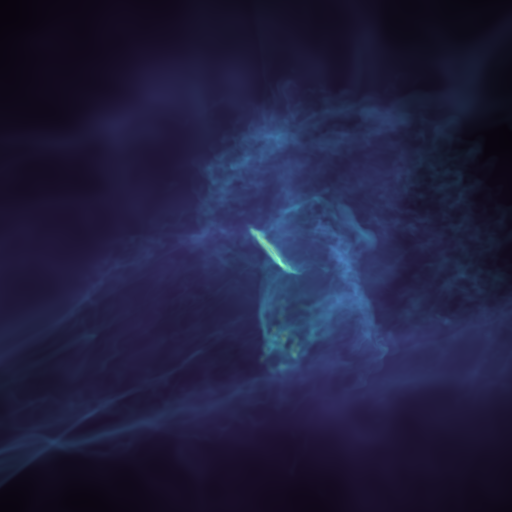

In [96]:
im = sc.render()
sc.show(sigma_clip=8)

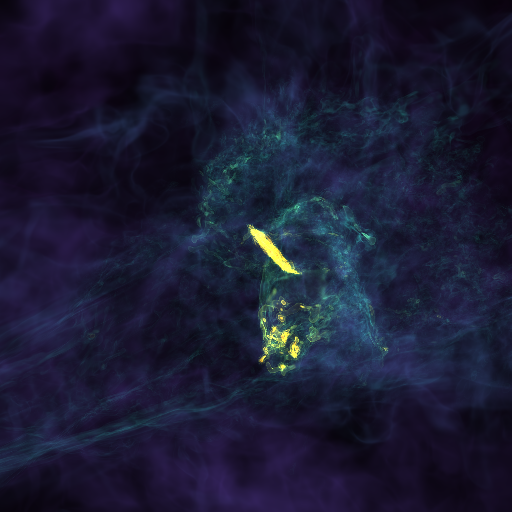

In [89]:
im = sc.render()
sc.show(sigma_clip=8)

yt : [INFO     ] 2021-07-02 15:37:30,100 Rendering scene (Can take a while).


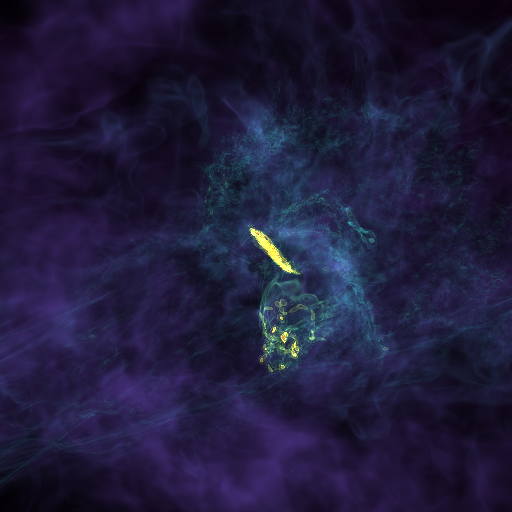

In [118]:
im = sc.render()
sc.show(sigma_clip=8)

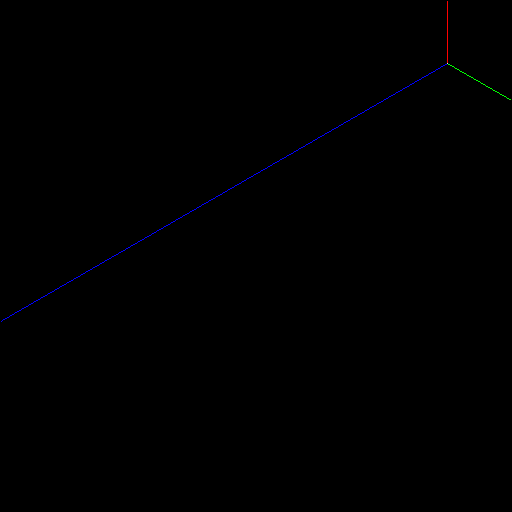

In [104]:
sc.annotate_axes(alpha=0.5)
im = sc.render()
sc.show(sigma_clip=8)

New <Camera Object>:
	position:[0.472893 0.457659 0.470829] unitary
	focus:[0.473893 0.458659 0.471829] unitary
	north_vector:[ 0.81649658 -0.40824829 -0.40824829] dimensionless
	width:[0.5 0.5 1. ] unitary
	light:None
	resolution:(256, 256)
Lens: <Lens Object>:
	lens_type:perspective
	viewpoint:[0.76256813 0.74733413 0.76050413] unitary unitary


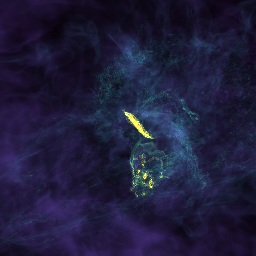

In [61]:
cam.set_width(ds.arr([0.5, 0.5, 1.0], 'code_length'))
cam.switch_orientation()
print('New', cam)

im = sc.render()
sc.show(sigma_clip=8)

In [ ]:
cam.rotate(np.pi/4.0, rot_center=ds.arr(cam.focus))
cam.switch_orientation()
print('New', cam)

im = sc.render()
sc.show(sigma_clip=8)

In [ ]:
cam.yaw(np.pi/4.0, rot_center=ds.arr(cam.focus))
cam.switch_orientation()
print('New', cam)

im = sc.render()
sc.show(sigma_clip=8)

In [ ]:
ds.arr(cam.focus), np.array([0.5, 0.5, 0.5]), cam.get_position(), cam.unit_vectors

In [ ]:
# lower the value of sigma_clip, higher the contrast
sigma_clip = 8
sc.show(sigma_clip=sigma_clip)

In [ ]:
print(sc)

In [ ]:
text_string = 'Blizzard\nz = %.1F'%(ds.current_redshift)

In [ ]:
# save the image, flooring especially bright pixels for better contrast
sc.save_annotate(fig_dir + 'trial_rendering_sigma_clip%0.1F.png' % sigma_clip, sigma_clip=sigma_clip, text_annotate=[[(.1, 0.95), text_string]])

In [ ]:
# iter_rotate(theta, n) rotates the scene by a TOTAL of angle theta over n frames; for the example below
# total rotation of pi (180 degrees) over 10 frames i.e. each frame will have pi/10 rotation
nframes = 10
for i in cam.iter_rotate(np.pi, nframes, rot_vector=cam.unit_vectors[1], rot_center=ds.arr(cam.focus)):
    print('Doing', i, 'out of', nframes)
    im = sc.render()
    sc.save(fig_dir + 'trial_rendering_sigma_clip%0.1F_rotation_%03i.png' % (sigma_clip, i), sigma_clip=sigma_clip)